In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.plot(range(0,20) + np.random.random(20))
plt.ylabel('some numbers')
plt.show()
 

In [ ]:
sess= tf.InteractiveSession()
a = tf.Variable([1,2],name="foo")
init = tf.global_variables_initializer()
sess.run(init)
sess.run(a)
 

In [ ]:
import hashlib
import random
import matplotlib.pyplot as plt
%matplotlib inline
 
a={}
init=['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f']
for i in init:
    a[i]=0

for i in range(1,1000000):
    x=str(random.random())
    for i in range(1,1000):
        x = hashlib.sha224(x).hexdigest()
    a[x[0]] +=1

print a
plt.plot(a.values())
plt.show()



In [ ]:
plt.plot(a.values())

In [41]:
from scipy import signal
from scipy import stats
import csv
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
 
fh1 = open("classC_ship1_SSDG.csv")
fh2 = open("classC_ship2_SSDG.csv")
fh3 = open("classA_ship1_allMRG.csv")
r1 = csv.reader(fh3)
r2 = csv.reader(fh2)

hack1=list(r1)
hack2=list(r2) 

code for Class C Ship 1
215 vs 216, 59 vs 74, 1 vs 110

error count  5


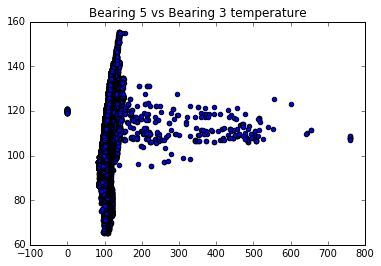

In [73]:
from sklearn import svm

fh3 = open("svm_boundary.csv")
svmcsv = csv.reader(fh3)
b = list(svmcsv)
boundary=[]
for a in b:
    boundary.append(a[0])
     
boundary= np.array(boundary)
x=[]
y=[]
good_bad=[]
gc =0
bc=0
err=0
for i in range(1, len(hack1)):  
    try:
        nx = float(hack1[i][5])
        ny = float(hack1[i][6])
        y.append(ny)
        x.append(nx)
        j = int(nx)
        #if (y[j] > boundary[j]):
        if(j > 500):
            good_bad.append(1)       
            gc +=1
        else:
            good_bad.append(0)
            bc +=1 
    except:
        err +=1
print "error count ", err

            
plt.scatter(x,y) 
plt.title("Bearing 5 vs Bearing 3 temperature")
plt.show()
x=np.array(x)
y=np.array(y)
X = np.transpose(np.array([x,y]))
  

In [57]:
good_bad=[]
for i in range(0, X.shape[0]):
    if(X[i,1]< 700.0):
        good_bad.append(0)
    else:
        good_bad.append(1)
        
clf = svm.SVC( kernel="linear", verbose=True)

 
print clf.fit(X[1:10000], good_bad[1:10000]) 

print clf.predict([76.0, 5380.0])
print clf.predict([100.0, 900.0])
print clf.predict([0,0])
print clf.predict([75, 600])

 
        

ValueError: The number of classes has to be greater than one; got 1

Class C Ship 2

In [ ]:
x=[]
y=[]
for i in range(0, len(hack2)):
    try:
        nx = float(hack2[i][74])
        ny = float(hack2[i][229])
        y.append(ny)
        x.append(nx)
    except:
        True
plt.scatter(x,y) 
plt.title("Speed vs Fuel Pressure C1S2")
plt.show()

In [ ]:
from scipy import signal
from scipy import stats
import csv
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
fs = 10e3
N = 1e5
fh = open("classC_ship2_SSDG.csv")
reader =csv.reader(fh)
hack=list(reader)
print(hack[0])
print(hack[0][31])
print(hack[0][33])

x=[]
for r in range(1, len(hack)):
    try:
        x.append(float(hack[r][7]))
    except:
        True 
    
plt.plot(x)
plt.show()
 
signal.spectrogram(x)

#hack = genfromtxt("classA_ship1_allGTG.csv")
#amp = 2* np.sqrt(2)
#noise_power = 0.01 * fs / 2
#time = np.arange(N) / float(fs)
#mod = 500*np.cos(2*np.pi*0.25*time)
#carrier = amp * np.sin(2*np.pi*3e3*time + mod) 
#noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
#noise *= np.exp(-time/5)
#x = carrier + noise
f, t, Sxx = signal.spectrogram(x, fs)
#k = stats.kurtosis(Sxx, 1) # kurtosis of a bin
print(f.shape, t.shape)
print(Sxx.shape)
plt.pcolormesh(t, f[0:20], Sxx[0:20,:])


 
#plt.ylabel('Frequency [Hz]')
#plt.xlabel('Time [sec]')
plt.show()
#plt.plot(k)